<a href="https://colab.research.google.com/github/AlexanderAvocone/Studium/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Daten einlesen**
Ziel der Übung ist die Datenanalyse von der Titanic-challenge mit verschiedenen ML-Modellen.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# Als Erstes müssen die Daten geladen und grob überflogen werden um sich einen Eindruck über die Einträge zu verschaffen

In [2]:
#Daten laden
train = pd.read_csv("train.csv")


#Overview der Daten
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##**Grobe Datenübersicht**


In [3]:
#Datentyp der Columns mit Angabe der NaN-Values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB




Wie zu sehen sind die Cabin-Einträge zu mehr als 3/4 nicht vorhanden. 
Hier wäre es ratsam die Spalte einfach komplett zu löschen, da sie fürs training unbrauchbar ist.

Auch ist die Ticket- und PassengerId-Spalte unbrauchbar.


In [4]:
train["Ticket"].sample(20)


474                7553
208              367231
555              113807
236               26707
404              315096
793            PC 17600
504              110152
684               29750
341               19950
491    SOTON/OQ 3101317
575              358585
548              363291
639              376564
321              349219
380            PC 17757
779               24160
687              349228
807              347087
494           A/4 45380
350                7267
Name: Ticket, dtype: object

In [5]:
train.drop(["Cabin","Ticket"],axis=1, inplace = True)
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')

Mittels der describe()-Funktion erhält man einen groben Überblick über die Daten, wie zum Beispiel die Überlebensrate und die Altersspanne.


In [6]:
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##**Visualisierung**
Um ein besseres Gespür für die Daten zu erhalten ist die Visualisierung ein guter Anfang.
Vorallem die Anzahl der Überlebenden sortiert nach Geschlecht und Alter.


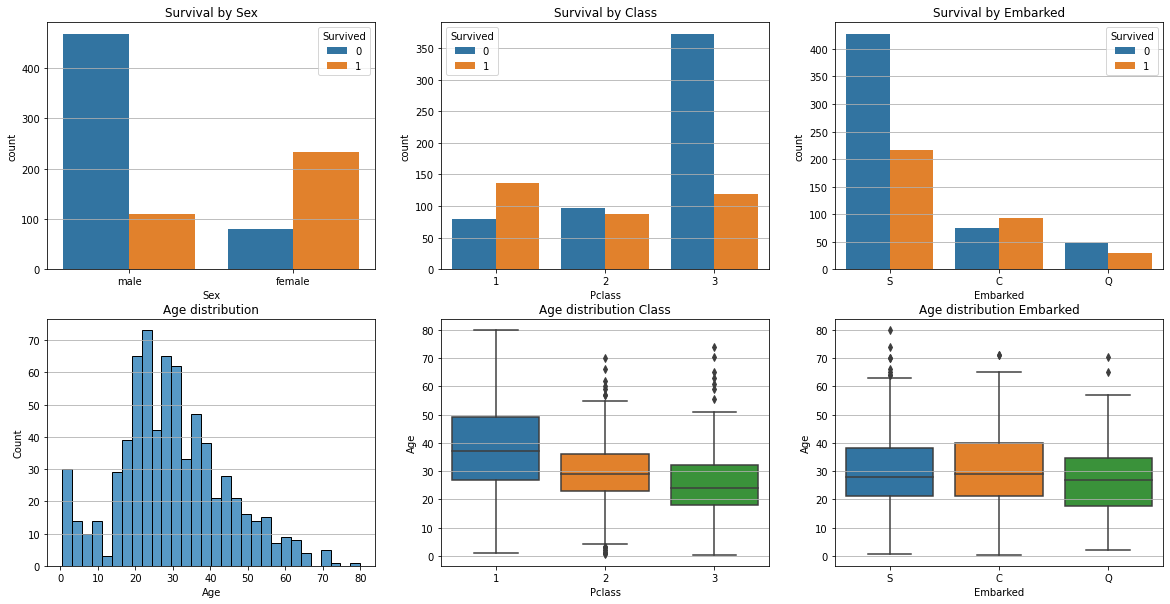

In [7]:
f,ax = plt.subplots(2,3,figsize=(20,10))


#Survived Sex
plt.subplot(2,3,1)
sns.countplot(x="Sex", data = train, hue = "Survived")
plt.title("Survival by Sex")
plt.grid(axis ="y")

#Survived Class
plt.subplot(2,3,2)
sns.countplot(x="Pclass", data = train, hue = "Survived")
plt.title("Survival by Class")
plt.grid(axis ="y")

#Survived Embarked
plt.subplot(2,3,3)
sns.countplot(x="Embarked", data = train, hue = "Survived")
plt.title("Survival by Embarked")
plt.grid(axis ="y")

#Age
plt.subplot(2,3,4)
sns.histplot(train["Age"], bins = 30, kde = False) # kde = die Ausgleichskurve
plt.title("Age distribution")
plt.grid(axis ="y")

#Age Class
plt.subplot(2,3,5)
sns.boxplot(x = train["Pclass"],y = train["Age"])
plt.title("Age distribution Class")
plt.grid(axis ="y")

#Age Embarked
plt.subplot(2,3,6)
sns.boxplot(x = train["Embarked"],y = train["Age"])
plt.title("Age distribution Embarked")
plt.grid(axis ="y")





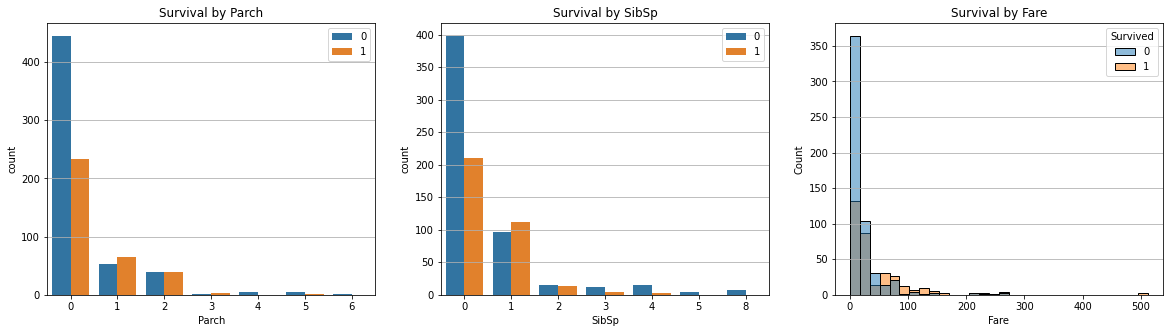

In [8]:
f,ax = plt.subplots(1,3,figsize=(20,5))
#Survived Parch
plt.subplot(1,3,1)
sns.countplot(x="Parch", data = train, hue = "Survived")
plt.title("Survival by Parch")
plt.grid(axis ="y")
plt.legend(loc = "upper right")

#Survived SibSp
plt.subplot(1,3,2)
sns.countplot(x="SibSp", data = train, hue = "Survived")
plt.title("Survival by SibSp")
plt.grid(axis ="y")
plt.legend(loc = "upper right")

#Survived Fare
plt.subplot(1,3,3)
sns.histplot(x="Fare", data = train, hue = "Survived", bins = 30)
plt.title("Survival by Fare")
plt.grid(axis ="y")



##**Datenaufbereitung**
Als Nächstes müssen wir nun die verbleibenden Daten für die statistischen Modelle vorbereiten, da die Modelle nur Zahlenwerte verarbeiten können. Für "Sex" bietet sich eine binäre Einteilung ein. 

In [9]:
#replace-Funktion mittels dictionary
train["Sex"] = train["Sex"].replace({"male":1, "female":0})


Gleiches gilt für "Embarked" und "Name".




In [10]:
train["Embarked"].replace({"S":0, "C":1, "Q":2}, inplace = True)
#Neue DF für "Name lenght"
new_train = train
new_train["Name"]= train["Name"].apply(lambda x: len(x))
new_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,23,1,22.0,1,0,7.2500,0.0
1,2,1,1,51,0,38.0,1,0,71.2833,1.0
2,3,1,3,22,0,26.0,0,0,7.9250,0.0
3,4,1,1,44,0,35.0,1,0,53.1000,0.0
4,5,0,3,24,1,35.0,0,0,8.0500,0.0


##**Bereinigung der Daten**

Als Nächstes befassen wir uns mit der Bereinigung der Daten von Ausreißern und NaN-values.
Mit der Annahme, dass die Daten einer Normalverteilung folgen, können wir die Ausreißer mittels der Standardabweichung $\sigma$ eliminieren. 68% aller Messerwerte liegen bei einer Abweichung von 1$\sigma$  um den Erwartungswert. Für 2$\sigma$ sind es 95% und bei 3$\sigma$ sogar 99,7% der Werte.
 Wir begnügen uns in diesem Fall mit 2$\sigma$.

In [11]:
from collections import Counter

#Findet Zeilen mit mehr als 2 Ausreißern
def Ausreisser (df, columns):
  #Liste mit den Indizes aller Spalten mit einem Ausreißer
  Indices = []
  
  
  for values in columns:
    #obere und untere Grenze
    upper = df[values].mean() + 2*df[values].std()
    lower = df[values].mean() - 2*df[values].std()
    #Daten mit einem Ausreißer
    data = df[(df[values] > upper) | (df[values] < lower)].index

    #Indizes der nachfolgenden Spalten werden einfach hinzugefuegt
    Indices.extend(data)


#Passagiere mit mehr als 2 Ausreißern gleichzeitig
#Liste von Counter.elements() um nach Dreifach-Elementen zu suchen
  counter = (list(Counter(Indices).elements()))
  i = 0
  double_indices = []
  while (i < len(counter)-2):
    if counter[i] == counter[i+2] :
      double_indices.append(counter[i])
    i+=1

  return(double_indices)


 


    

In [12]:
outliers = Ausreisser(new_train, ["Age","SibSp","Fare","Parch"])

#Passagiere mit mehr als 2 Ausreißern
new_train.iloc[outliers]



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
438,439,0,1,17,1,64.0,1,4,263.0,0.0
27,28,0,1,30,1,19.0,3,2,263.0,0.0
88,89,1,1,26,0,23.0,3,2,263.0,0.0
341,342,1,1,30,0,24.0,3,2,263.0,0.0


In [13]:
new_train[["Age","SibSp","Fare","Parch"]].describe()

,Age,SibSp,Fare,Parch
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,32.204208,0.381594
std,14.526497,1.102743,49.693429,0.806057
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,7.910400,0.000000
50%,28.000000,0.000000,14.454200,0.000000
75%,38.000000,1.000000,31.000000,0.000000
max,80.000000,8.000000,512.329200,6.000000


Wie man sehen kann sind diese Passagiere Ausreißer in 3 Kathegorien: Fare, Parch und SibSp.

In [14]:
#Drop Ausreisser von "Age","SibSp","Fare","Parch"
new_train.drop(outliers, axis = 0, inplace = True)

##Fehlende Werte (NaN) ergänzen
Bei fehlenden Werten funktionieren die ML-Algorithmen nicht, weshalb wir sie ergänzen/entfernen müssen.

In [15]:
#Anzahl der NaN-Values
new_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

Bei 177 Werten ("Age") ist das Löschen der NaN-Values nicht zu empfehlen, da die Menge an Trainingsdaten erheblich schrumpfen würde.
Eine einfache Methode ist das ersetzen der NaN-Values durch den Mittelwert mit zufälliger Abweichung im Bereich [-$\sigma$,$\sigma$].
Für "Embarked" empfiehlt sich eher der Median, da es nur ganze Zahlen annehmen kann.

In [16]:
Age = new_train["Age"]
mean = Age.mean()
sigma = Age.std()
Age.fillna(np.random.randint(mean - sigma, mean + sigma ), inplace = True) 
new_train["Embarked"].fillna(new_train["Embarked"].median(), inplace = True)

In [17]:
new_train.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000
mean,446.998873,0.383315,2.314543,26.970688,0.648253,27.351939,0.514092,0.372041,31.163415,0.363021
std,257.246373,0.486468,0.833309,9.295332,0.477785,13.787628,1.095638,0.793047,47.318277,0.636642
min,1.000000,0.000000,1.000000,12.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,224.500000,0.000000,2.000000,20.000000,0.000000,18.000000,0.000000,0.000000,7.895800,0.000000
50%,448.000000,0.000000,3.000000,25.000000,1.000000,24.000000,0.000000,0.000000,14.454200,0.000000
75%,669.500000,1.000000,3.000000,30.500000,1.000000,35.000000,1.000000,0.000000,30.695800,1.000000
max,891.000000,1.000000,3.000000,82.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


Somit sind alle Werte numerisch und kann von einem ML-Modell verwendet werden.

##**Feature selection**

Je mehr Attribute zur Vorhersage verwendet werden, desto anfälliger ist das Modell. Mittels der Covariant-Matrix kann man ganz gut die Korrelation der einzelnen Attribute vergleichen. Je näher die Zahl an |1|, desto stärker die Korrelation.

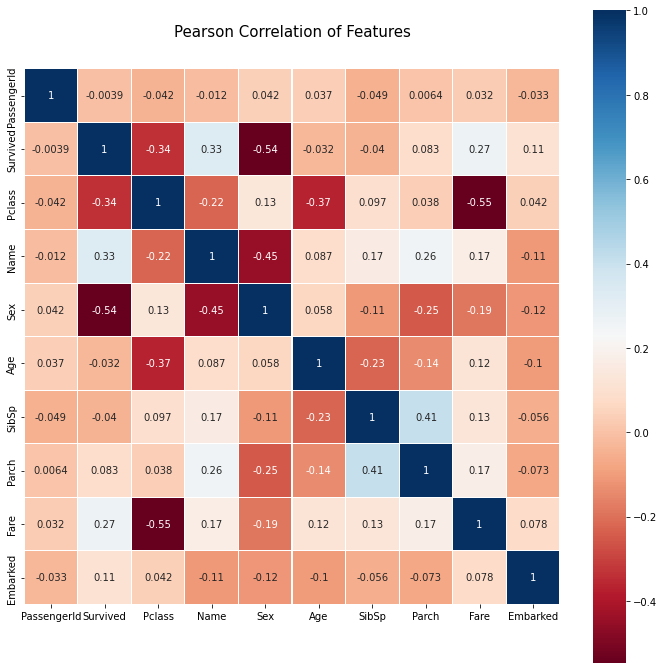

In [18]:
colormap = plt.cm.RdBu
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(new_train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

Aus der "Survived"-Spalte sehen wir die stärksten Korrelationen mit "Sex", "Fare", "Name" und "Pclass".

In [19]:
new_train.drop(["Parch","Embarked","Age", "PassengerId"],axis=1, inplace = True)

In [20]:
new_train.head()

,Survived,Pclass,Name,Sex,SibSp,Fare
0,0,3,23,1,1,7.2500
1,1,1,51,0,1,71.2833
2,1,3,22,0,0,7.9250
3,1,1,44,0,1,53.1000
4,0,3,24,1,0,8.0500


##**Vorhersagemodelle**
Hier verwenden wir nun 5 verschiedene ML-Modelle um herrauszufinden, welches bei dieser Aufgabe am Besten abschneidet.

* Logistic Regression
* SVM
* Decision Tree / Random Forest
* KNN
* Perceptron

In [21]:
import sklearn # Collection of machine learning algorithms
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [22]:
#Aufteilen der Daten in test und train
X_train = new_train.drop("Survived", axis=1)
Y_train = new_train["Survived"]
X_train, x_test, Y_train, y_test = train_test_split(X_train, Y_train, test_size=0.33, random_state=101, stratify = Y_train)
#stratify splittet die daten so, dass das verhältnis zwischen überlebenden und toten auch gleich bleibt


##Logistic Regression


In [23]:
logreg = LogisticRegression(penalty = "l2",solver = "liblinear")
logreg.fit(X_train, Y_train)
logreg_pred = logreg.predict(x_test)
print("Die Genauigkeit beträgt {}%".format(round(logreg.score(x_test, y_test) * 100, 2)))

Die Genauigkeit beträgt 79.86%


##Support Vector Machines (SVM)

In [24]:
svc=SVC(gamma = "auto")  #Werte nicht normiert --> gamma = "auto"
svc.fit(X_train, Y_train)
Y_pred2 = svc.predict(x_test)
print("Die Genauigkeit beträgt {}%".format(round(svc.score(x_test, y_test) * 100, 2)))

Die Genauigkeit beträgt 68.94%


##Decision Tree

In [25]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
decision_tree_pred = decision_tree.predict(x_test)
print("Die Genauigkeit beträgt {}%".format(round(decision_tree.score(x_test, y_test) * 100, 2)))

Die Genauigkeit beträgt 75.43%


##KNN

In [26]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn_pred = knn.predict(x_test)
print("Die Genauigkeit beträgt {}%".format(round(knn.score(x_test, y_test) * 100, 2)))

Die Genauigkeit beträgt 70.65%


##Perceptron (single-layerd neural network)

In [27]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
perceptron_pred = perceptron.predict(x_test)
print("Die Genauigkeit beträgt {}%".format(round(perceptron.score(x_test, y_test) * 100, 2)))

Die Genauigkeit beträgt 64.85%


##Fazit
In unserem Fall erzielt die logistische Regression das beste Ergebnis.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


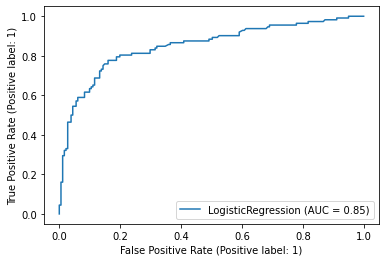

In [28]:
#test

from sklearn.metrics import plot_roc_curve
log_reg = plot_roc_curve(logreg, x_test, y_test)
